In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.dummy import DummyClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [2]:
import random
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [3]:
df_train = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')
df_test  = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')

In [4]:
X = df_train[df_train.columns[:-1]]
Y = df_train['Made_Purchase']

In [5]:
X['HomePage'].fillna(value = int(X["HomePage"].mean()),inplace = True)
X['LandingPage'].fillna(value = int(X["LandingPage"].mean()),inplace = True)
X['ProductDescriptionPage'].fillna(value = int(X["ProductDescriptionPage"].mean()),inplace = True)


X['HomePage_Duration'].fillna(value = X["HomePage_Duration"].mean(),inplace = True)
X['LandingPage_Duration'].fillna(value = X["LandingPage_Duration"].mean(),inplace = True)
X['ProductDescriptionPage_Duration'].fillna(value = X["ProductDescriptionPage_Duration"].mean(),inplace = True)



X['GoogleMetric:Bounce Rates'].fillna(value = X["GoogleMetric:Bounce Rates"].mean(),inplace = True)
X['GoogleMetric:Exit Rates'].fillna(value = X["GoogleMetric:Exit Rates"].mean(),inplace = True)
X['GoogleMetric:Page Values'].fillna(value = X["GoogleMetric:Page Values"].mean(),inplace = True)

X['SeasonalPurchase'].fillna(value = 0,inplace = True)
X['Month_SeasonalPurchase'].fillna(method = 'ffill',inplace = True)


X['OS'].fillna(value = X['OS'].mode().iloc[0],inplace = True)
X['SearchEngine'].fillna(value = X['SearchEngine'].mode().iloc[0],inplace = True)
X['Zone'].fillna(value = X['Zone'].mode().iloc[0],inplace = True)
X['Type of Traffic'].fillna(value = X['Type of Traffic'].mode().iloc[0],inplace = True)
X['Gender'].fillna(value = X['Gender'].mode().iloc[0],inplace = True)
X['Cookies Setting'].fillna(value = X['Cookies Setting'].mode().iloc[0],inplace = True)
X['Marital Status'].fillna(value = X['Marital Status'].mode().iloc[0],inplace = True)
X['WeekendPurchase'].fillna(value = X['WeekendPurchase'].mode().iloc[0],inplace = True)
X['CustomerType'].fillna(value = X['CustomerType'].mode().iloc[0],inplace = True)
X['Education'].fillna(value = X['Education'].mode().iloc[0],inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [6]:
df_test['HomePage'].fillna(value = int(X["HomePage"].mean()),inplace = True)
df_test['LandingPage'].fillna(value = int(X["LandingPage"].mean()),inplace = True)
df_test['ProductDescriptionPage'].fillna(value = int(X["ProductDescriptionPage"].mean()),inplace = True)


df_test['HomePage_Duration'].fillna(value = X["HomePage_Duration"].mean(),inplace = True)
df_test['LandingPage_Duration'].fillna(value = X["LandingPage_Duration"].mean(),inplace = True)
df_test['ProductDescriptionPage_Duration'].fillna(value = X["ProductDescriptionPage_Duration"].mean(),inplace = True)



df_test['GoogleMetric:Bounce Rates'].fillna(value = X["GoogleMetric:Bounce Rates"].mean(),inplace = True)
df_test['GoogleMetric:Exit Rates'].fillna(value = X["GoogleMetric:Exit Rates"].mean(),inplace = True)
df_test['GoogleMetric:Page Values'].fillna(value = X["GoogleMetric:Page Values"].mean(),inplace = True)

df_test['SeasonalPurchase'].fillna(value = 0,inplace = True)
df_test['Month_SeasonalPurchase'].fillna(method = 'ffill',inplace = True)


df_test['OS'].fillna(value = X['OS'].mode().iloc[0],inplace = True)
df_test['SearchEngine'].fillna(value = X['SearchEngine'].mode().iloc[0],inplace = True)
df_test['Zone'].fillna(value = X['Zone'].mode().iloc[0],inplace = True)
df_test['Type of Traffic'].fillna(value = X['Type of Traffic'].mode().iloc[0],inplace = True)
df_test['Gender'].fillna(value = X['Gender'].mode().iloc[0],inplace = True)
df_test['Cookies Setting'].fillna(value = X['Cookies Setting'].mode().iloc[0],inplace = True)
df_test['Marital Status'].fillna(value = X['Marital Status'].mode().iloc[0],inplace = True)
df_test['WeekendPurchase'].fillna(value = X['WeekendPurchase'].mode().iloc[0],inplace = True)
df_test['CustomerType'].fillna(value = X['CustomerType'].mode().iloc[0],inplace = True)
df_test['Education'].fillna(value = X['Education'].mode().iloc[0],inplace = True)

In [7]:
ohe = OneHotEncoder()

list_one_hot = ['OS','Month_SeasonalPurchase', 'SearchEngine', 'Zone', 'Type of Traffic',
       'CustomerType', 'Gender', 'Cookies Setting', 'Education',
       'Marital Status', 'WeekendPurchase']


for i in list_one_hot:
    ohe.fit(X[i].values.reshape(-1,1))
    ohe_df = ohe.transform(df_test[i].values.reshape(-1,1)).toarray()
    dfOneHot = pd.DataFrame(ohe_df, columns = [i+'_'+str(int(j)) for j in range(ohe_df.shape[1])]) 
    dfOneHot.drop(dfOneHot.columns[[len(dfOneHot.columns)-1]], inplace = True , axis = 1)
    df_test = pd.concat([df_test, dfOneHot], axis=1)
    df_test.drop([i], inplace = True , axis = 1)
    
    
    
for i in list_one_hot:
    ohe_df = ohe.fit_transform(X[i].values.reshape(-1,1)).toarray()
    dfOneHot = pd.DataFrame(ohe_df, columns = [i+'_'+str(int(j)) for j in range(ohe_df.shape[1])]) 
    dfOneHot.drop(dfOneHot.columns[[len(dfOneHot.columns)-1]], inplace = True , axis = 1)
    X = pd.concat([X, dfOneHot], axis=1)
    X.drop([i], inplace = True , axis = 1)
    


In [8]:
scaler = MinMaxScaler()
scaler.fit(X)

X_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_array, columns = X.columns)


test_array = scaler.transform(df_test)
df_test_scaled = pd.DataFrame(test_array, columns = X.columns)

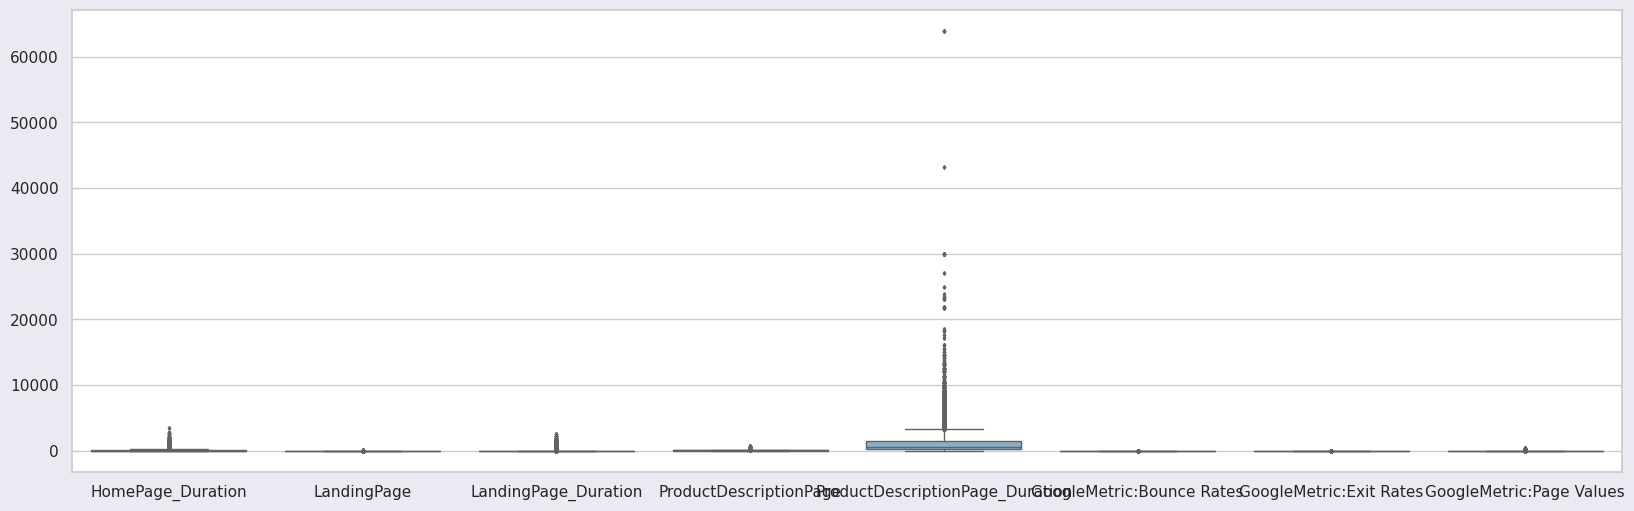

In [9]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(20, 6), facecolor=facecolor)

        
ax = sns.boxplot(data=X[X.columns[1:9]], 
                 palette='Set3', 
                 linewidth=1, 
                 fliersize=2, )

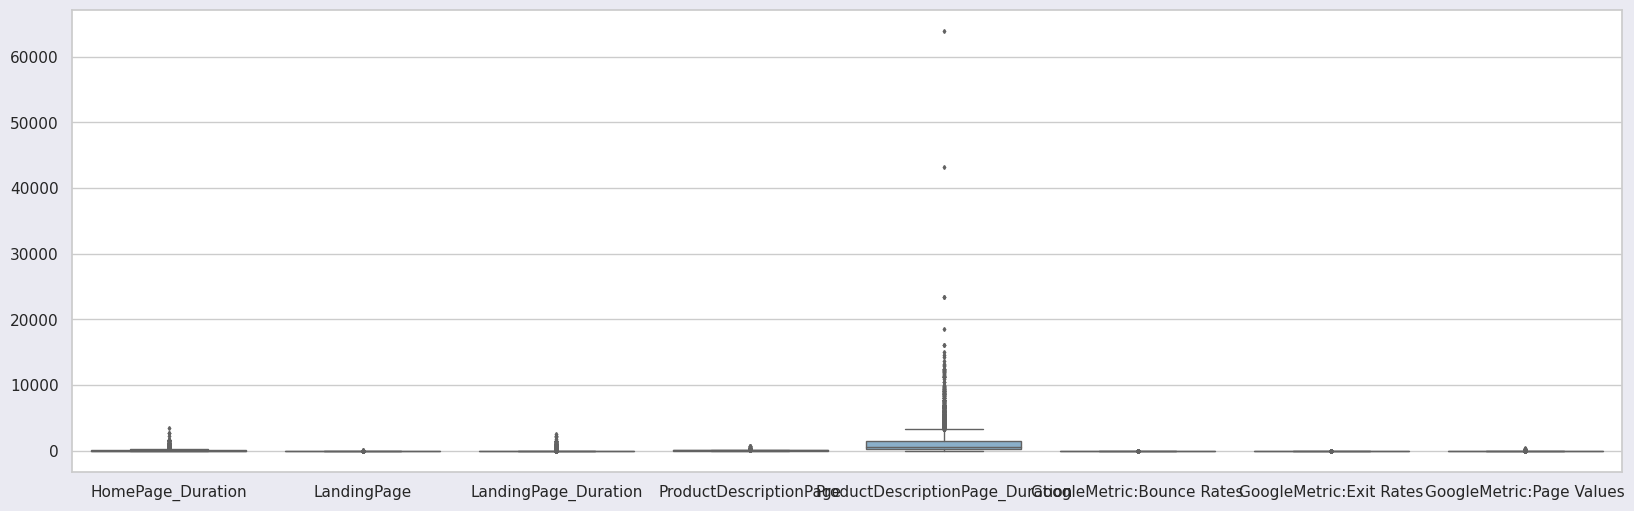

In [10]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(20, 6), facecolor=facecolor)

        
ax = sns.boxplot(data=df_test[df_test.columns[1:9]], 
                 palette='Set3', 
                 linewidth=1, 
                 fliersize=2, )
        

<AxesSubplot:>

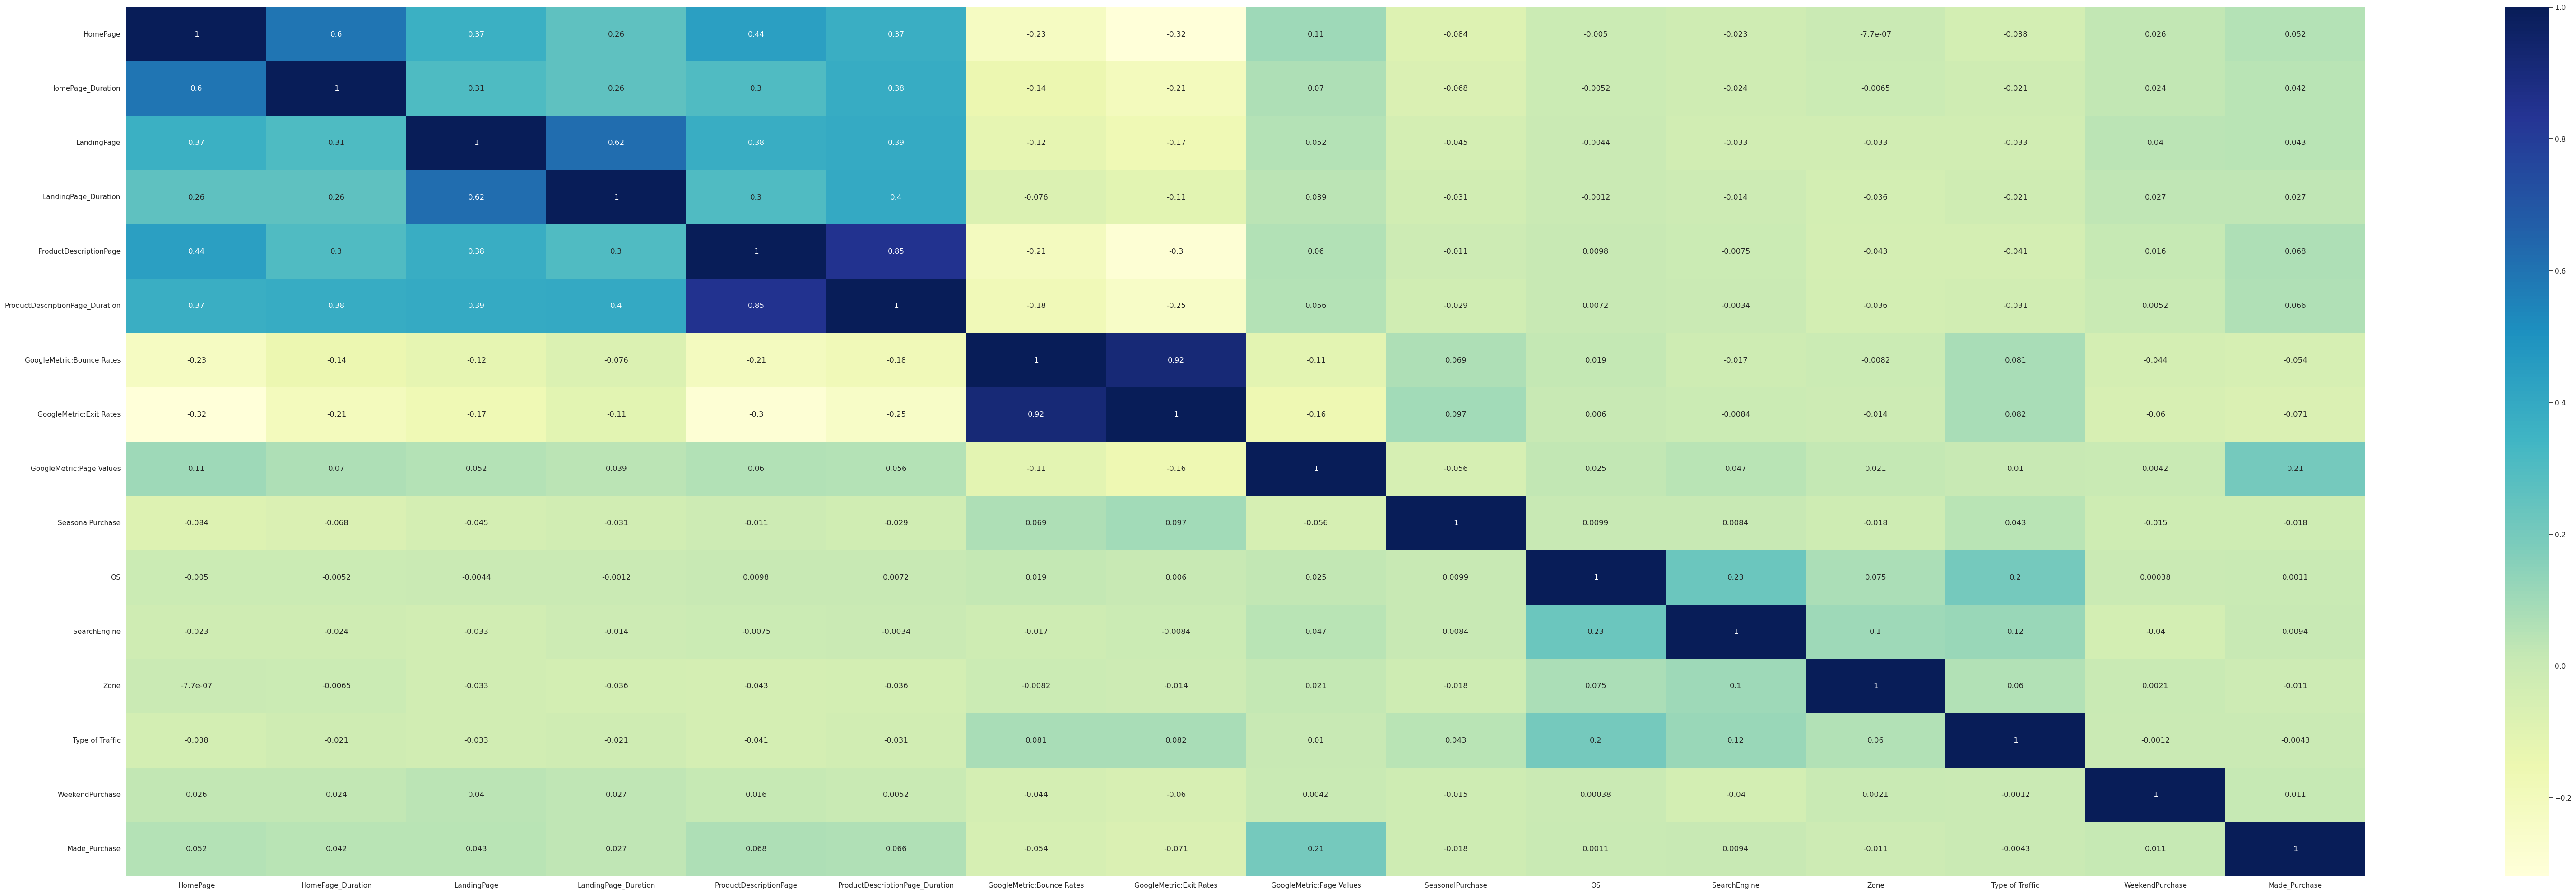

In [11]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.figure(figsize = (80,25))
sns.heatmap(df_train.corr(),cmap="YlGnBu", annot=True)

In [12]:
X["Made_Purchase"] = df_train["Made_Purchase"]

In [13]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# plt.figure(figsize = (80,25))
# sns.heatmap(X.corr(),cmap="YlGnBu", annot=True)

In [14]:
X = X.drop('Made_Purchase', axis = 1)

## *Logistic Regression*

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state =42 )

In [16]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
for solver in solvers:
    logreg = LogisticRegression(solver=solver,max_iter=1000)
    logreg.fit(X_train,Y_train)
    preds2 = logreg.predict(X_test)
    Y_list = Y_test.to_list()
    good = 0
    for i in range(len(preds2)):
        if preds2[i] == Y_list[i]:
            good += 1
    print(solver,good/len(preds2))

lbfgs 0.6628959276018099
liblinear 0.6626696832579185
newton-cg 0.6626696832579185
sag 0.6626696832579185
saga 0.6626696832579185


In [17]:
# X_train = X_train.drop('ProductDescriptionPage_Duration', axis = 1)
# X_test = X_test.drop('ProductDescriptionPage_Duration', axis = 1)

In [18]:
logreg = LogisticRegression(solver='liblinear',max_iter=1000)
logreg.fit(X_train,Y_train)
preds = logreg.predict(df_test_scaled)

In [19]:
kaggle_data = pd.DataFrame({'Made_Purchase':preds})
kaggle_data.rename_axis('ID', axis='rows',inplace = True)
kaggle_data

,Made_Purchase
ID,
0,False
1,False
2,False
3,False
4,False
...,...
6594,False
6595,False
6596,False


In [20]:
kaggle_data.to_csv("submission.csv")

## *ADA BOOST*

In [21]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.datasets import make_classification

# clf = AdaBoostClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, Y_train)



# preds = clf.predict(X_test)
# Y_list = Y_test.to_list()
# good = 0
# for i in range(len(preds)):
#     if preds[i] == Y_list[i]:
#         good += 1
# print(good/len(preds))

In [22]:
# X_test

In [23]:
# preds = clf.predict(df_test_scaled)

In [24]:
# kaggle_data = pd.DataFrame({'Made_Purchase':preds})
# kaggle_data.rename_axis('ID', axis='rows',inplace = True)
# kaggle_data.to_csv("submission.csv")

## *Bagging Classfier*

In [25]:
# import scipy
# from sklearn.svm import SVC
# from sklearn.ensemble import BaggingClassifier

# clf = BaggingClassifier(base_estimator = SVC(),n_estimators=10,max_features = 5,warm_start = True, random_state=42)
# clf.fit(X_train, Y_train)

# preds = clf.predict(X_test)
# Y_list = Y_test.to_list()
# good = 0
# for i in range(len(preds)):
#     if preds[i] == Y_list[i]:
#         good += 1
# print(good/len(preds))

# preds = clf.predict_proba(X_test)
# lst = []
# for i in range(0,20):
#     pred_used = []
#     for j in preds:
#         if j[0] > i*0.05:
#             pred_used.append(False)
#         else: pred_used.append(True)
#     good = 0
#     for k in range(len(preds)):
#         if pred_used[k] == Y_list[k]:
#             good += 1
#     lst.append((good/len(preds),i))
# print(max(lst))

## *HistGradientBoostingClassifier*

In [26]:
# from sklearn.ensemble import HistGradientBoostingClassifier
# clf = HistGradientBoostingClassifier(random_state = 42)
# clf.fit(X_train, Y_train)
# clf.score(X_train, Y_train)

# preds = clf.predict(X_test)
# Y_list = Y_test.to_list()
# good = 0
# for i in range(len(preds)):
#     if preds[i] == Y_list[i]:
#         good += 1
# print(good/len(preds))

# preds = clf.predict_proba(X_test)
# lst = []
# for i in range(0,20):
#     pred_used = []
#     for j in preds:
#         if j[0] > i*0.05:
#             pred_used.append(False)
#         else: pred_used.append(True)
#     good = 0
#     for k in range(len(preds)):
#         if pred_used[k] == Y_list[k]:
#             good += 1
#     lst.append((good/len(preds),i))
# print(max(lst))

# preds = clf.predict(df_test_scaled)
# kaggle_data = pd.DataFrame({'Made_Purchase':preds})
# kaggle_data.rename_axis('ID', axis='rows',inplace = True)
# kaggle_data.to_csv("submission.csv")

## *Voting Classifier*

In [27]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier


# clf1 = LogisticRegression( random_state=42, max_iter = 1000)
# clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
# clf3 = GaussianNB()


# clf = VotingClassifier(estimators=[
#         ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
# clf.fit(X_train, Y_train)
# clf.score(X_train, Y_train)

# preds = clf.predict(X_test)
# Y_list = Y_test.to_list()
# good = 0
# for i in range(len(preds)):
#     if preds[i] == Y_list[i]:
#         good += 1
# print(good/len(preds))





# clf = VotingClassifier(estimators=[
#         ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
# clf.fit(X_train, Y_train)
# clf.score(X_train, Y_train)

# preds = clf.predict(X_test)
# Y_list = Y_test.to_list()
# good = 0
# for i in range(len(preds)):
#     preds[i] = 1 - preds[i]
#     if preds[i] == Y_list[i]:
#         good += 1
# print(good/len(preds))

# preds = clf.predict_proba(X_test)
# lst = []
# for i in range(0,20):
#     pred_used = []
#     for j in preds:
#         if j[0] > i*0.05:
#             pred_used.append(False)
#         else: pred_used.append(True)
#     good = 0
#     for k in range(len(preds)):
#         if pred_used[k] == Y_list[k]:
#             good += 1
#     lst.append((good/len(preds),i))
# print(min(lst))

## *Stacking Classifier*

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


estimators = [
    ('rf', RandomForestClassifier(n_estimators=1000, random_state=2,max_depth = 10,min_samples_leaf=50)),
    ('svr',make_pipeline(StandardScaler(),LinearSVC(random_state=2,max_iter=5000)))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=KNeighborsClassifier(n_neighbors=75)
)

print(clf.fit(X_train, Y_train).score(X_test,Y_test))



# preds = clf.predict_proba(X_test)
# lst = []
# for i in range(0,20):
#     pred_used = []
#     for j in preds:
#         if j[0] > i*0.05:
#             pred_used.append(False)
#         else: pred_used.append(True)
#     good = 0
#     for k in range(len(preds)):
#         if pred_used[k] == Y_list[k]:
#             good += 1
#     lst.append((good/len(preds),i))
# print(max(lst))

preds = clf.predict(df_test_scaled)
kaggle_data = pd.DataFrame({'Made_Purchase':preds})
kaggle_data.rename_axis('ID', axis='rows',inplace = True)
kaggle_data.to_csv("submission.csv")

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

0.670814479638009


In [29]:
preds = clf.predict(X_test)

In [30]:
# print(clf.fit(X_train, Y_train).score(X_test, Y_test))

## *KNN*

In [31]:
# X_train_new = X_train[X_train.columns[0:8]]
# X_test_new = X_test[X_test.columns[0:8]]

In [32]:
# from sklearn.neighbors import KNeighborsClassifier
# for i in range(1,100):
#     neigh = KNeighborsClassifier(n_neighbors=i)
#     score = neigh.fit(X_train, Y_train).score(X_test,Y_test)
#     print(score,i)

In [33]:
# X_train_new = X_train[X_train.columns[0:8]]
# X_test_new = X_test[X_test.columns[0:8]]

In [34]:
# for i in range(1,100):
#     neigh = KNeighborsClassifier(n_neighbors=i,weights='distance')
#     score = neigh.fit(X_train_new, Y_train).score(X_test_new,Y_test)
#     print(score,i)

## *ID3*

In [35]:

# from sklearn.datasets import load_iris
# from sklearn.model_selection import cross_val_score
# from sklearn.tree import DecisionTreeClassifier


# clf = DecisionTreeClassifier(random_state=42)
# DecisionTreeClassifier(criterion="entropy")

# print(clf.fit(X_train,Y_train).score(X_test,Y_test))
# print(clf.fit(X_train_new,Y_train).score(X_test_new,Y_test))

## *OTHER IDEAS*

1. Removing Highly Correlated Variables \\\ Didn't work as expect
2. Feature Engineering
    2.1. Combine the page view into a single column
    2.2. Make the duration variables into low medium and high induvidually and together
3. Stacking with better fraction of rows for knn    

In [36]:
df_train = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')

In [37]:
df_train.isna().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [38]:
df_train['HomePage'].fillna(value = int(df_train["HomePage"].mean()),inplace = True)
df_train['LandingPage'].fillna(value = int(df_train["LandingPage"].mean()),inplace = True)
df_train['ProductDescriptionPage'].fillna(value = int(df_train["ProductDescriptionPage"].mean()),inplace = True)


df_train['HomePage_Duration'].fillna(value = df_train["HomePage_Duration"].mean(),inplace = True)
df_train['LandingPage_Duration'].fillna(value = df_train["LandingPage_Duration"].mean(),inplace = True)
df_train['ProductDescriptionPage_Duration'].fillna(value = df_train["ProductDescriptionPage_Duration"].mean(),inplace = True)



df_train['GoogleMetric:Bounce Rates'].fillna(value = df_train["GoogleMetric:Bounce Rates"].mean(),inplace = True)
df_train['GoogleMetric:Exit Rates'].fillna(value = df_train["GoogleMetric:Exit Rates"].mean(),inplace = True)
df_train['GoogleMetric:Page Values'].fillna(value = df_train["GoogleMetric:Page Values"].mean(),inplace = True)

df_train['SeasonalPurchase'].fillna(value = 0,inplace = True)
df_train['Month_SeasonalPurchase'].fillna(method = 'ffill',inplace = True)


df_train['OS'].fillna(value = df_train['OS'].mode().iloc[0],inplace = True)
df_train['SearchEngine'].fillna(value = df_train['SearchEngine'].mode().iloc[0],inplace = True)
df_train['Zone'].fillna(value = df_train['Zone'].mode().iloc[0],inplace = True)
df_train['Type of Traffic'].fillna(value = df_train['Type of Traffic'].mode().iloc[0],inplace = True)
df_train['Gender'].fillna(value = df_train['Gender'].mode().iloc[0],inplace = True)
df_train['Cookies Setting'].fillna(value = df_train['Cookies Setting'].mode().iloc[0],inplace = True)
df_train['Marital Status'].fillna(value = df_train['Marital Status'].mode().iloc[0],inplace = True)
df_train['WeekendPurchase'].fillna(value = df_train['WeekendPurchase'].mode().iloc[0],inplace = True)
df_train['CustomerType'].fillna(value = df_train['CustomerType'].mode().iloc[0],inplace = True)
df_train['Education'].fillna(value = df_train['Education'].mode().iloc[0],inplace = True)





ohe = OneHotEncoder()

list_one_hot = ['OS','Month_SeasonalPurchase', 'SearchEngine', 'Zone', 'Type of Traffic',
       'CustomerType', 'Gender', 'Cookies Setting', 'Education',
       'Marital Status', 'WeekendPurchase']

    
    
    
for i in list_one_hot:
    ohe_df = ohe.fit_transform(df_train[i].values.reshape(-1,1)).toarray()
    dfOneHot = pd.DataFrame(ohe_df, columns = [i+'_'+str(int(j)) for j in range(ohe_df.shape[1])]) 
    dfOneHot.drop(dfOneHot.columns[[len(dfOneHot.columns)-1]], inplace = True , axis = 1)
    df_train = pd.concat([df_train, dfOneHot], axis=1)
    df_train.drop([i], inplace = True , axis = 1)
    
    
    
scaler = MinMaxScaler()
df_train_array = scaler.fit_transform(df_train)
df_train_scaled = pd.DataFrame(df_train_array, columns = df_train.columns)



In [39]:
df_train_scaled

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,Gender_0,Gender_1,Cookies Setting_0,Cookies Setting_1,Education_0,Education_1,Education_2,Marital Status_0,Marital Status_1,WeekendPurchase_0
0,0.000000,0.000000,0.000000,0.000000,0.001418,0.000000,1.000000,1.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
1,0.000000,0.000000,0.000000,0.000000,0.002837,0.000042,0.250000,0.700000,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.000000,0.000000,0.000000,0.000000,0.014184,0.009809,0.100000,0.250000,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.001418,0.000000,1.000000,1.000000,0.0,0.4,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,0.037037,0.001177,0.000000,0.000000,0.055319,0.015368,0.076923,0.087995,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
14727,0.296296,0.034431,0.083333,0.022358,0.015603,0.003953,0.000000,0.055392,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
14728,0.074074,0.022243,0.083333,0.256063,0.014184,0.017877,0.000000,0.116667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14729,0.000000,0.000000,0.000000,0.000000,0.008511,0.016522,0.000000,0.166667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [40]:


df_train_new1 = df_train_scaled.loc[df_train_scaled['Made_Purchase'] == True]
df_train_new2 = df_train_scaled.loc[df_train_scaled['Made_Purchase'] == False][:5666]
df_train_new = pd.concat([df_train_new1,df_train_new2])

df_train_new = df_train_new.sample(frac = 1)
df_train_new

X = df_train_new.drop(['Made_Purchase'], axis=1)
Y = df_train_new['Made_Purchase']

In [41]:
X,Y

(       HomePage  HomePage_Duration  LandingPage  LandingPage_Duration  \
 717    0.000000           0.000000     0.000000              0.000000   
 11371  0.407407           0.040113     0.083333              0.028438   
 3735   0.037037           0.022655     0.000000              0.000000   
 12750  0.148148           0.066930     0.125000              0.169532   
 4821   0.000000           0.000000     0.000000              0.000000   
 ...         ...                ...          ...                   ...   
 10945  0.074074           0.006767     0.000000              0.000000   
 11536  0.666667           0.178930     0.250000              0.287835   
 11606  0.074074           0.014417     0.041667              0.049816   
 1353   0.000000           0.000000     0.000000              0.000000   
 11985  0.037037           0.021184     0.041667              0.002354   
 
        ProductDescriptionPage  ProductDescriptionPage_Duration  \
 717                  0.004255             

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state =42 )

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


estimators = [
    ('rf', RandomForestClassifier(n_estimators=1000, random_state=2)),
    ('svr',make_pipeline(StandardScaler(),LinearSVC(random_state=2,max_iter=500)))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=KNeighborsClassifier(n_neighbors=75)
)

print(clf.fit(X_train, Y_train).score(X_test,Y_test))



# preds = clf.predict_proba(X_test)
# lst = []
# for i in range(0,20):
#     pred_used = []
#     for j in preds:
#         if j[0] > i*0.05:
#             pred_used.append(False)
#         else: pred_used.append(True)
#     good = 0
#     for k in range(len(preds)):
#         if pred_used[k] == Y_list[k]:
#             good += 1
#     lst.append((good/len(preds),i))
# print(max(lst))

preds = clf.predict(df_test_scaled)
kaggle_data = pd.DataFrame({'Made_Purchase':preds})
kaggle_data.rename_axis('ID', axis='rows',inplace = True)
kaggle_data.to_csv("submission.csv")

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

0.7405882352941177


In [44]:
def predict(X):
    """Predict the class labels for the provided data.
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_queries, n_features), \
            or (n_queries, n_indexed) if metric == 'precomputed'
        Test samples.
    Returns
    -------
    y : ndarray of shape (n_queries,) or (n_queries, n_outputs)
        Class labels for each data sample.
    """
    check_is_fitted(self, "_fit_method")
    if self.weights == "uniform":
        if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
            X, self._fit_X, self.metric
        ):
            probabilities = self.predict_proba(X)
            if self.outputs_2d_:
                return np.stack(
                    [
                        self.classes_[idx][np.argmax(probas, axis=1)]
                        for idx, probas in enumerate(probabilities)
                    ],
                    axis=1,
                )
            return self.classes_[np.argmax(probabilities, axis=1)]
        # In that case, we do not need the distances to perform
        # the weighting so we do not compute them.
        neigh_ind = self.kneighbors(X, return_distance=False)
        neigh_dist = None
    else:
        neigh_dist, neigh_ind = self.kneighbors(X)

    classes_ = self.classes_
    _y = self._y
    if not self.outputs_2d_:
        _y = self._y.reshape((-1, 1))
        classes_ = [self.classes_]

    n_outputs = len(classes_)
    n_queries = _num_samples(X)
    weights = _get_weights(neigh_dist, self.weights)

    y_pred = np.empty((n_queries, n_outputs), dtype=classes_[0].dtype)
    for k, classes_k in enumerate(classes_):
        if weights is None:
            mode, _ = _mode(_y[neigh_ind, k], axis=1)
        else:
            mode, _ = weighted_mode(_y[neigh_ind, k], weights, axis=1)

        mode = np.asarray(mode.ravel(), dtype=np.intp)
        y_pred[:, k] = classes_k.take(mode)

    if not self.outputs_2d_:
        y_pred = y_pred.ravel()

    return y_pred